## Movie Quote Analysis

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

In [ ]:
import numpy as np
import pandas as pd
import string
import operator
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text
import re
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
headerList1 = ["character_id_1","character_id_2","movie_id","line_ids"]

conversations_data=pd.read_csv('movie_conversations.tsv',sep='\t',names=headerList1, on_bad_lines='skip')
conversations_data.head()

,character_id_1,character_id_2,movie_id,line_ids
0,u0,u2,m0,['L194' 'L195' 'L196' 'L197']
1,u0,u2,m0,['L198' 'L199']
2,u0,u2,m0,['L200' 'L201' 'L202' 'L203']
3,u0,u2,m0,['L204' 'L205' 'L206']
4,u0,u2,m0,['L207' 'L208']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
headerList2 = ["movie_id", "movie_title", "movie_year", "IMDB rating", "no. IMDB votes", "genres"]


movie_titles_data = pd.read_csv('movie_titles_metadata.tsv',sep = '\t',names=headerList2, on_bad_lines='skip')
movie_titles_data.head()


,movie_id,movie_title,movie_year,IMDB rating,no. IMDB votes,genres
0,m0,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
1,m1,1492: conquest of paradise,1992,6.2,10421.0,['adventure' 'biography' 'drama' 'history']
2,m2,15 minutes,2001,6.1,25854.0,['action' 'crime' 'drama' 'thriller']
3,m3,2001: a space odyssey,1968,8.4,163227.0,['adventure' 'mystery' 'sci-fi']
4,m4,48 hrs.,1982,6.9,22289.0,['action' 'comedy' 'crime' 'drama' 'thriller']


In [ ]:
headerList3 = ["line_id", "char_id", "movie_id", "name", "text"]

movie_lines_data=pd.read_csv('movie_lines.tsv',sep='\t',names=headerList3,on_bad_lines='skip')
movie_lines_data.head()

,line_id,char_id,movie_id,name,text
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


In [ ]:
headerList4 = ["id", "name", "movie_id", "movie_title", "gender", "credits_position"]


character_data = pd.read_csv('movie_characters_metadata.tsv',sep = '\t',names=headerList4,on_bad_lines='skip')
character_data.head()

,id,name,movie_id,movie_title,gender,credits_position
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6


In [ ]:
# merge movie lines and movie title

# merging datasets here
merged_data = movie_lines_data.merge(movie_titles_data, how='outer', on='movie_id')
merged_data.dropna(inplace=True)

merged_data_char_id = conversations_data.merge(character_data, how='outer', on = 'movie_id')
merged_data_char_id = merged_data_char_id.merge(movie_titles_data, how = 'outer', on = ['movie_id','movie_title'])

merged_data_char_id = merged_data_char_id.drop(columns = ['line_ids','credits_position','movie_year','no. IMDB votes', 'IMDB rating','movie_title'])
# merged_data_char_id = merged_data_char_id.merge(movie_lines_data, how = 'outer', on = 'movie_id')
print(merged_data_char_id)

# create most common words for movie of different genres
merged_data = pd.DataFrame(merged_data, columns=['genres', 'text','movie_title',])
merged_data = merged_data.dropna()



# making lowercase
merged_data['text'] = merged_data['text'].apply(str.lower)
# removing punctuation
merged_data['text'] = merged_data['text'].str.replace(r'[^\w\s]+', '')
merged_data.head()



        character_id_1 character_id_2  \
0                   u0             u2   
1                   u0             u2   
2                   u0             u2   
3                   u0             u2   
4                   u0             u2   
...                ...            ...   
1293469            NaN            NaN   
1293470            NaN            NaN   
1293471            NaN            NaN   
1293472            NaN            NaN   
1293473            NaN            NaN   

                                                  movie_id  \
0                                                       m0   
1                                                       m0   
2                                                       m0   
3                                                       m0   
4                                                       m0   
...                                                    ...   
1293469                                                NaN   
1293470    

<ipython-input-8-78dd6a57551f>:23: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_data['text'] = merged_data['text'].str.replace(r'[^\w\s]+', '')


,genres,text,movie_title
0,['comedy' 'romance'],they do not,10 things i hate about you
1,['comedy' 'romance'],they do to,10 things i hate about you
2,['comedy' 'romance'],i hope so,10 things i hate about you
3,['comedy' 'romance'],she okay,10 things i hate about you
4,['comedy' 'romance'],lets go,10 things i hate about you


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')

# merging datasets
merged_data = movie_lines_data.merge(movie_titles_data, how='outer', on='movie_id')
merged_data.dropna(inplace=True)
print(merged_data['text'][125])

# making lowercase
merged_data['text'] = merged_data['text'].apply(str.lower)
# removing punctuation
merged_data['text'] = merged_data['text'].str.replace(r'[^\w\s]+', '')
# tokenization
merged_data['text'] = merged_data['text'].apply(nltk.word_tokenize)
merged_data.head()

print(merged_data['text'][125])

# sample_data = {'a', 'dog', 'went', 'to', 'the', 'park'}
#def checkStopwords(line):
 #   filtered_line = [word for word in line if not word in stopwords.words("english")]
  #  return filtered_line
# print(checkStopwords(sample_data))

#merged_data['filtered_line'] = merged_data['text'].apply(checkStopwords)
#merged_data.head()

merged_data['filtered_text'] = merged_data['text'].apply(lambda x: ' '.join([word for word in x if not word in stopwords.words("english")]))
merged_data.head()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In 9th.  For a month


<ipython-input-9-e1ae3dfa925a>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_data['text'] = merged_data['text'].str.replace(r'[^\w\s]+', '')


['in', '9th', 'for', 'a', 'month']


,line_id,char_id,movie_id,name,text,movie_title,movie_year,IMDB rating,no. IMDB votes,genres,filtered_text
0,L1045,u0,m0,BIANCA,"[they, do, not]",10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],
1,L1044,u2,m0,CAMERON,"[they, do, to]",10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],
2,L985,u0,m0,BIANCA,"[i, hope, so]",10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],hope
3,L984,u2,m0,CAMERON,"[she, okay]",10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],okay
4,L925,u0,m0,BIANCA,"[lets, go]",10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],lets go


In [ ]:
# Feb 5, average length of each text
length = movie_lines_data['text'].str.len()
avg_length = length.sum()/len(length)
print("Average length of string: ", avg_length)

# average length of words in each string
def extract_word(input_string):
    string_lower = input_string.lower()
    for punctuation in string.punctuation:
        if(punctuation == '\''):
          continue
        string_lower = string_lower.replace(punctuation, " ")
    string_split = string_lower.split()
    extract_list = []
    for each_string in string_split:
        extract_list.append(each_string)
    return extract_list

Average length of string:  52.741483186457465


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

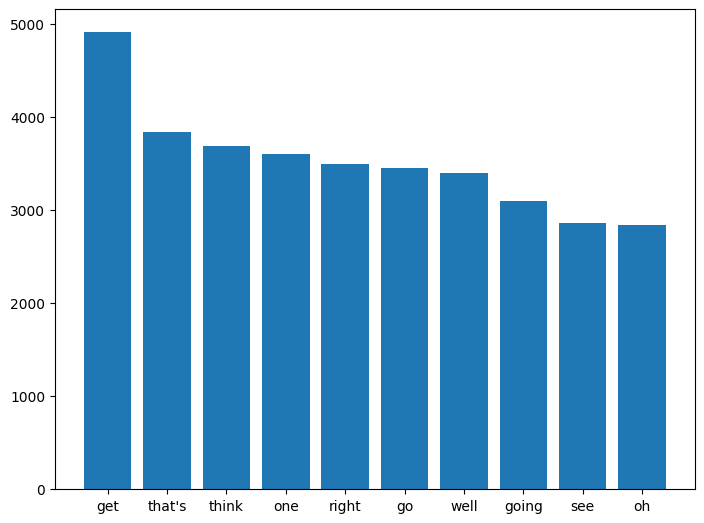

In [ ]:
# Feb 5, word frequencies

from pandas.core.window.common import defaultdict
from IPython.core.magics.script import default

#remove common words
my_stop_words_fr = nltk.corpus.stopwords.words("english")


my_stop_words = list(my_stop_words_fr)
print(my_stop_words)
#appending words that didn't origanlly occur in the stop words list for some reason
my_stop_words.append('just')
my_stop_words.append('i\'m')
my_stop_words.append('know')
my_stop_words.append('like')
my_stop_words.append('you\'re')
my_stop_words.append('got')
my_stop_words.append('want')
my_stop_words.append('don\'t')

# create dictionary of words without stop words inside them
word_dict = defaultdict(int)
sum_word_len = 0
for each_string in movie_lines_data['text']:
    if type(each_string) == str:
        extracted_word = extract_word(each_string)
        sum_word_len += len(extracted_word)
        for each_word in extracted_word:
            if each_word not in my_stop_words:
                word_dict[each_word]+=1

#revised_movie_lines = movie_lines_data
#revised_movie_lines = revised_movie_lines[~revised_movie_lines['text'].isin(my_stop_words)]


#print the top ten most averagely commonly used words
avg_word_len = sum_word_len/len(movie_lines_data['text'])
print("Average length of words in each string: ", avg_word_len)
# most frequent word
frequent_words = []
num_exist = []
for i in range(1, 11):
    frequent_word = sorted(word_dict, key=word_dict.get)[-i]
    frequent_words.append(frequent_word)
    num_exist.append(word_dict[frequent_word])
    print(i, "th frequent word: " , frequent_word, word_dict[frequent_word])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(frequent_words, num_exist)
plt.show()


**Create visulizations**

In [ ]:
from textblob import TextBlob
import nltk
nltk.download('brown')


blob = TextBlob(str(merged_data['filtered_text']))
blob.noun_phrases

for sentence in blob.sentences:
  print(sentence.sentiment.polarity)

#'comedy', 'romance', 'biography', 'drama', 'history', 'action', 'crime', 'drama','history','thriller','fantasy','sci-fi','war','music'
genre_list = [['comedy',0,0], ['romance',0,0], ['biography',0,0], ['drama',0,0], ['history',0,0], ['action',0,0], ['crime',0,0], ['drama',0,0], ['history',0,0], ['thriller',0,0], ['fantasy',0,0], ['sci-fi',0,0], ['war',0,0], ['music',0,0]]
df = pd.DataFrame(genre_list, columns=['Genre', 'Sentiment', 'Number'])
genre_list = list(genre_list)

# for each_genres in merged_data['genres']:
#     if each_genres in genre_list:
#         continue
#     # if (len, map(nltk.word_tokenize, each_genres)) > 2:
#     # print(len(sentence.split()) for sentence in each_genres)
#     # genre_array = np.each_genres
#     # genre_array = genre_array.tolist()
#     # print(len(genre_array)

#     genre_list.append(each_genres)
#     word_dict = defaultdict(int)
#     sum_word_len = 0
#     data_genres = merged_data[merged_data['genres']==each_genres]
#     #print(data_genres)
#     for each_string in data_genres['text']:
#         if type(each_string) == str:
#             extracted_word = extract_word(each_string)
#             sum_word_len += len(extracted_word)
#             for each_word in extracted_word:
#                 if each_word not in my_stop_words:
#                     word_dict[each_word]+=1

merged_data_movies_text = merged_data[['movie_title','filtered_text']]
merged_data_movies_text

for row,index in merged_data.iterrows():
  sentiment = 0
  movie = row['movie_title']
  genre = row['genres']
  blob = TextBlob(str(row['filtered_text']))
  sentiment = 0
  for sentence in blob.sentences:
    sentiment = sentence.sentiment.polarity
  df.loc[df['Genre'] == genre, 'Sentiment'] += sentiment
  df.loc[df['Genre'] == genre, 'Number'] += 1

for genre in df:
  genre['Sentiment'] = genre['Sentiment']/genre['Number']


# for index,row in merged_data_genres_text.iterrows():
#   # print(row['genres'])
#   # genre_arr = row['genres'].to_numpy()
#   # blob = TextBlob()
#   sentiment = 0
#   for genre in genre_list:
#     num = 0
#       # print(genre[0])
#     if(row['genres'].__contains__(genre[0])):
#         blob = TextBlob(str(row['filtered_text']))
#         # print(genre[0])
#         sentiment = 0
#         for sentence in blob.sentences:
#           sentiment = sentence.sentiment.polarity
#         genre[1] += sentiment
#         # num += 1
#         genre[2] += 1

#     # print(genre[0], " ", genre[1], " ", genre[2])
#     # genre[1] = genre[1]/genre[2]
# #     plt.bar(genre[0], genre[1])

# for g in genre_list:
#   g[1] = g[1]/g[2] * 10
# # plt.show()



# for col in merged_data_genres_text:
#   genre_arr = merged_data_genres_text['genres'].to_numpy()
#   print(genre_arr)
#   print(type(genre_arr))
#   for genre in genre_arr:
#     for genre1 in genre_list:
#       if(genre.__contains__(genre1[0])):

#         print(genre1)
    # if(genre in genre_list):
    #   print(genre, " ")
    # for genre1 in genre_arr:
    #   print(genre, " " ,genre1)
    #   print(type(genre1))
    #   if(genre1 == genre):
    #     print(genre, " " ,genre1)

# for movie in merged_data['movie_title']:
#   temp_df = merged_data['movie_title' == str(movie)]



[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


0.03385416666666666


TypeError: ignored

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'comedy'),
  Text(1, 0, 'romance'),
  Text(2, 0, 'biography'),
  Text(3, 0, 'drama'),
  Text(4, 0, 'history'),
  Text(5, 0, 'action'),
  Text(6, 0, 'crime'),
  Text(7, 0, 'thriller'),
  Text(8, 0, 'fantasy'),
  Text(9, 0, 'sci-fi'),
  Text(10, 0, 'war'),
  Text(11, 0, 'music')])

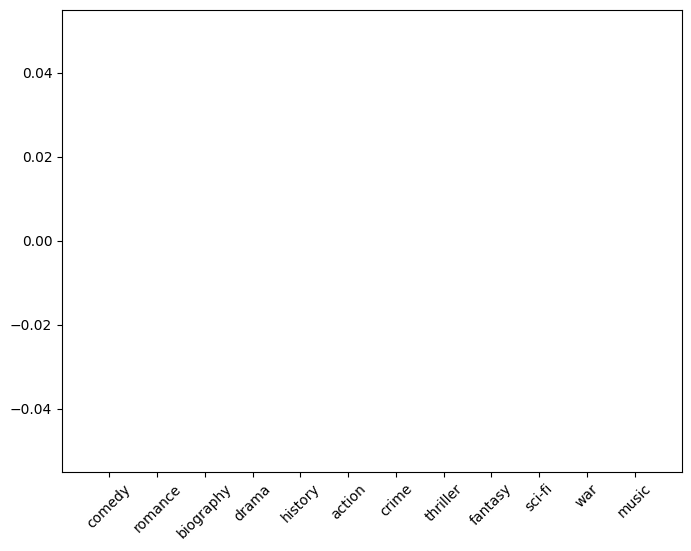

In [ ]:
# Set up the plot
import matplotlib.ticker as mtick
genre_list = [(genre[0], genre[1]) for genre in genre_list]



# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar([genre[0] for genre in genre_list], [genre[1] for genre in genre_list])

# Set the y-axis tick format to percentage
#fmt = '%.0f%%' # Format you want the ticks, here it is set to display whole numbers
#yticks = mtick.FormatStrFormatter(fmt)
#ax.yaxis.set_major_formatter(yticks)

  # # Set the x-axis label rotation angle to 45 degrees
plt.xticks(rotation=45)

In [ ]:
from textblob import TextBlob
import nltk
nltk.download('brown')


blob = TextBlob(str(merged_data['filtered_text']))
blob.noun_phrases

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


WordList(['thanks max im', 'sure faith', 'naw wont', 'yup darn', 'lucky wake 22shor', 'name', 'length'])

In [ ]:
if(int(merged_data['movie_year'][1]) > 10):
  print("yay")

**Average polarity throughout years visulization (copy pasted code from above)**

In [ ]:
#same code as above, but instead looping through and updating a 'movie years' list
year_list = [['Pre-60s',0,0], ['1960s',0,0], ['1970s',0,0], ['1980s',0,0], ['1990s',0,0], ['2000s',0,0], ['2010s',0,0]]
year_list = list(year_list)

merged_years = merged_data[['movie_year', 'filtered_text']]


for index,row in merged_years.iterrows():
  # print(row['genres'])
  # genre_arr = row['genres'].to_numpy()
  # blob = TextBlob()
  sentiment = 0
  if(row['movie_year'].__contains__('/I')):
    continue
  if(int(row["movie_year"]) > 2009):
    blob = TextBlob(str(row['filtered_text']))
    # print(genre[0])
    sentiment = 0
    for sentence in blob.sentences:
      sentiment = sentence.sentiment.polarity
    year_list[6][1] += sentiment
    year_list[6][2] += 1
  if(int(row["movie_year"]) > 1999):
    blob = TextBlob(str(row['filtered_text']))
    # print(genre[0])
    sentiment = 0
    for sentence in blob.sentences:
      sentiment = sentence.sentiment.polarity
    year_list[5][1] += sentiment
    year_list[5][2] += 1
  if(int(row["movie_year"]) > 1989):
    blob = TextBlob(str(row['filtered_text']))
    # print(genre[0])
    sentiment = 0
    for sentence in blob.sentences:
      sentiment = sentence.sentiment.polarity
    year_list[4][1] += sentiment
    year_list[4][2] += 1
  if(int(row["movie_year"]) > 1979):
    blob = TextBlob(str(row['filtered_text']))
    # print(genre[0])
    sentiment = 0
    for sentence in blob.sentences:
      sentiment = sentence.sentiment.polarity
    year_list[3][1] += sentiment
    year_list[3][2] += 1
  if(int(row["movie_year"]) > 1969):
    blob = TextBlob(str(row['filtered_text']))
    # print(genre[0])
    sentiment = 0
    for sentence in blob.sentences:
      sentiment = sentence.sentiment.polarity
    year_list[2][1] += sentiment
    year_list[2][2] += 1
  if(int(row["movie_year"]) > 1959):
    blob = TextBlob(str(row['filtered_text']))
    # print(genre[0])
    sentiment = 0
    for sentence in blob.sentences:
      sentiment = sentence.sentiment.polarity
    year_list[1][1] += sentiment
    year_list[1][2] += 1
  if(int(row["movie_year"]) <= 1959):
    blob = TextBlob(str(row['filtered_text']))
    # print(genre[0])
    sentiment = 0
    for sentence in blob.sentences:
      sentiment = sentence.sentiment.polarity
    year_list[0][1] += sentiment
    year_list[0][2] += 1


for y in year_list:
  y[1] = y[1]/y[2] * 10

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Pre-60s'),
  Text(1, 0, '1960s'),
  Text(2, 0, '1970s'),
  Text(3, 0, '1980s'),
  Text(4, 0, '1990s'),
  Text(5, 0, '2000s'),
  Text(6, 0, '2010s')])

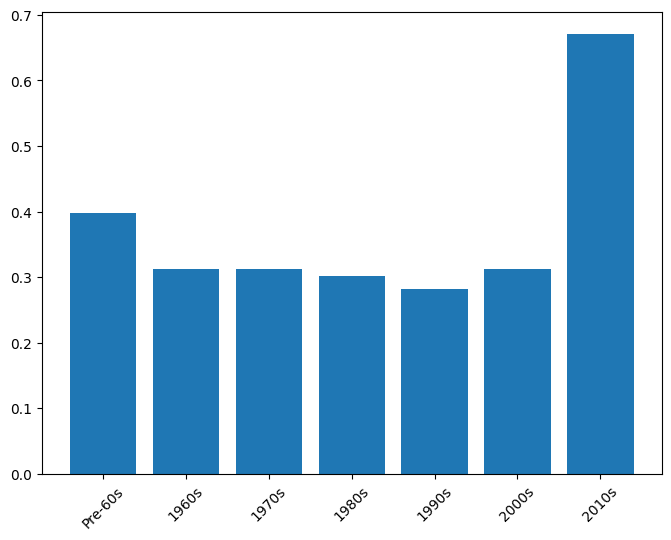

In [ ]:
# Set up the plot
import matplotlib.ticker as mtick
year_list = [(year[0], year[1]) for year in year_list]



# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar([year[0] for year in year_list], [year[1] for year in year_list])

# Set the y-axis tick format to percentage
#fmt = '%.0f%%' # Format you want the ticks, here it is set to display whole numbers
#yticks = mtick.FormatStrFormatter(fmt)
#ax.yaxis.set_major_formatter(yticks)

  # # Set the x-axis label rotation angle to 45 degrees
plt.xticks(rotation=45)


In [ ]:
#add new column to the data frame that shows the sentiment of the text, so that we can use the groupby function and take the mean
from textblob import TextBlob
import nltk
nltk.download('brown')


# blob = TextBlob(str(merged_data['filtered_text']))



merged_data['sentiment'] = np.nan

for i, row in merged_data.iterrows():
    blob = TextBlob(str(row['filtered_text']))
    # print(blob)
    sentiment = 0
    for sentence in blob.sentences:
      sentiment = sentence.sentiment.polarity
    merged_data.at[i,'sentiment'] = sentiment

merged_data = merged_data.loc[~(merged_data['sentiment'] == 0.000000)]

merged_data['sentiment']




[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


3         0.500000
5         0.100000
6         0.500000
9         0.700000
10        0.700000
            ...   
109043    0.500000
109044   -0.600000
109045    0.200000
109046    0.032143
109048    0.333333
Name: sentiment, Length: 42105, dtype: float64

In [ ]:
grouped = merged_data.groupby('movie_title')['sentiment'].agg('mean')
print(type(grouped))
print(grouped)

grouped_df = grouped.to_frame()
grouped_df.head(15)

<class 'pandas.core.series.Series'>
movie_title
10 things i hate about you    0.080468
1492: conquest of paradise    0.051899
15 minutes                    0.071232
2001: a space odyssey         0.087060
48 hrs.                       0.066572
                                ...   
witness                       0.067014
x-men                        -0.045122
xxx                           0.026913
young frankenstein            0.139587
zulu dawn                     0.262362
Name: sentiment, Length: 222, dtype: float64


,sentiment
movie_title,
10 things i hate about you,0.080468
1492: conquest of paradise,0.051899
15 minutes,0.071232
2001: a space odyssey,0.087060
48 hrs.,0.066572
8mm,0.011009
a nightmare on elm street,0.057419
a nightmare on elm street 4: the dream master,-0.051646
a nightmare on elm street: the dream child,0.015558


In [ ]:
# grouped_df[['title', 'sentiment']] = grouped_df.iloc[:,0].str.extract(r'(\D+)(\d+)', expand=True)
# print(grouped_df.iloc[:,0])

movie_title
zulu dawn                                        0.262362
barry lyndon                                     0.240215
what women want                                  0.237500
pleasantville                                    0.200075
mr. smith goes to washington                     0.200012
                                                   ...   
x-men                                           -0.045122
labor of love                                   -0.046815
the night of the hunter                         -0.047047
a nightmare on elm street 4: the dream master   -0.051646
unforgiven                                      -0.069994
Name: sentiment, Length: 222, dtype: float64


In [ ]:
grouped_df = grouped_df.sort_values('sentiment', ascending=False)
most_sentiment = grouped_df.head(15)
least_sentiment = grouped_df.tail(15)
least_sentiment.head(15)
# most_sentiment.iloc[:,1]


,sentiment
movie_title,
affliction,-0.012951
basic,-0.023982
reservoir dogs,-0.029141
slash,-0.031804
bad lieutenant,-0.031969
fear and loathing in las vegas,-0.034121
wild things,-0.034191
serial mom,-0.038920
the boondock saints,-0.039882


In [ ]:
plt.bar(most_sentiment.iloc[:,0], most_sentiment.iloc[:,1])
plt.show()

IndexError: ignored

In [ ]:

# Feb 5, make list of every combination of genres

genre_list = []

for each_genres in merged_data['genres']:
    if each_genres in genre_list:
        continue
    genre_list.append(each_genres)
    word_dict = defaultdict(int)
    sum_word_len = 0
    data_genres = merged_data[merged_data['genres']==each_genres]
    #print(data_genres)
    for each_string in data_genres['text']:
        if type(each_string) == str:
            extracted_word = extract_word(each_string)
            sum_word_len += len(extracted_word)
            for each_word in extracted_word:
                if each_word not in my_stop_words:
                    word_dict[each_word]+=1


#     plot
#     frequent_words = []
#     num_exist = []
#     for i in range(1, 11):
#         frequent_word = sorted(word_dict, key=word_dict.get)[-i]
#         frequent_words.append(frequent_word)
#         num_exist.append(word_dict[frequent_word])
#         #print(i, "th frequent word: " , frequent_word, word_dict[frequent_word])

#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(frequent_words, num_exist)
#     plt.title(each_genres)
#     plt.show()

